En este ejercicio, aplicaremos el Análisis de Componentes Principales (PCA) al conjunto de datos de Ames, un famoso dataset
de propiedades inmobiliarias.

**Objetivo**

Explorar la estructura de correlación entre varias características y crear nuevas que
puedan mejorar un modelo de predicción.

1-EDA para entender mejor el dataset

1-Identificar características altamente correlacionadas con el precio de venta de las propiedades

2- Descomponer las características seleccionadas en componentes principales para reducir la dimensionalidad y captar la
varianza máxima en los datos.


3-Comprender cómo cada componente principal representa diferentes dimensiones de los datos y qué relaciones pueden ser
útiles para la modelización.


4-Generar nuevas características que reflejen las relaciones identificadas y que puedan
mejorar el rendimiento del modelo predictivo.


5- XGBoost para evaluar el impacto de las nuevas características en la predicción del
precio de venta, utilizando la métrica de RMSLE.

In [1]:
#Importaciones necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')

In [2]:
#Carga de Datos

df = pd.read_csv('train.csv')

#Es importante en este punto saber las dimensiones del dataset
print(f"El dataset presenta {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Tiene un total de {len(df)} registros")

El dataset presenta 1460 filas, 81 columnas
Tiene un total de 1460 registros


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

# Calcular porcentaje de valores faltantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
})
missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)

print(f"Columnas con valores faltantes: {len(missing_df)}")
print()
print(missing_df.head(10))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Tenemos un dataset con muchisimas entradas, de estas 11 columnas tienen una gran cantidad de características y gran cantidad de valores faltantes**

*Datos que tenemos en información ya que las columnans que vamos a utilizar no presentan valores faltantes*

Como tenemos gran cantidad de características buscamos analizar la variable objetivo por separado

In [5]:
# Detectar outliers
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

print(f"Outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
print(f"Rango normal: ${lower_bound:,.0f} - ${upper_bound:,.0f}")
print()

Outliers detectados: 61 (4.2%)
Rango normal: $3,938 - $340,038



Tenemos 61 outlayers, los cuales representan el 4.2% del dataset

Puede darse a características específicas de algunas casas como pueden ser ubicación, mayor área, condiciones,etc.

Al tener tantas columnas, es más efectivo calcular las correlaciones con la matriz de correlación y ordenándolos de mas a menos, antes de hacer un mapa de calor

In [6]:
#Correlaciones

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Matriz de correlación para variables numéricas
correlation_matrix = df[numeric_cols].corr()

# Correlaciones más fuertes con SalePrice
price_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(price_corr.head(10))
print()

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64



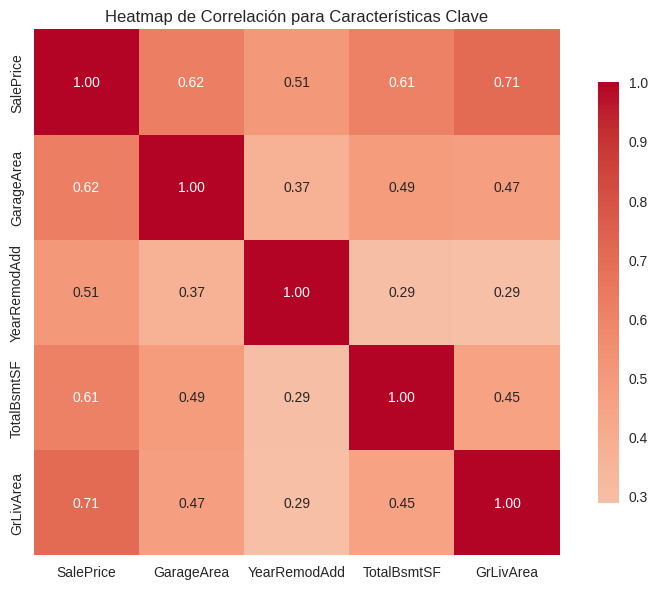

In [7]:
#Analiazamos la correlacion de las características más importnates
correlation_subset = df[['SalePrice', 'GarageArea', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea']].corr()

# Visualizar el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_subset,
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Heatmap de Correlación para Características Clave')
plt.tight_layout()
plt.show()

# Preparación de datos

Prepamos los datos para entrenar el modelo

In [8]:
# Selección de características relevantes
features = ['GarageArea', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea']

# Normalización de las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convertir a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)
# Comprobar
print(df_scaled.head())

   GarageArea  YearRemodAdd  TotalBsmtSF  GrLivArea
0    0.351000      0.878668    -0.459303   0.370333
1   -0.060731     -0.429577     0.466465  -0.482512
2    0.631726      0.830215    -0.313369   0.515013
3    0.790804     -0.720298    -0.687324   0.383659
4    1.698485      0.733308     0.199680   1.299326


In [9]:
missing_threshold = 0.50 * len(df)
cols_to_drop_missing = missing_df[missing_df['Valores_Faltantes'] > missing_threshold]['Columna'].tolist()

# Identificar columnas no numéricas
non_numeric_cols_for_pca = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Combinar listas de columnas a eliminar para PCA
cols_to_drop_pca = list(set(cols_to_drop_missing + non_numeric_cols_for_pca))

# Crear un DataFrame para PCA, eliminando las columnas identificadas
df_pca = df.drop(columns=cols_to_drop_pca)

# Imputar valores faltantes en las columnas restantes
for col in df_pca.columns:
    if df_pca[col].isnull().any():
        if df_pca[col].dtype != 'object': # Solo imputar numéricas
            median_val = df_pca[col].median()
            df_pca[col].fillna(median_val, inplace=True)


# Modelo

In [10]:
# Calculamos PCA en todos los componentes posibles (min(n_samples, n_features))
pca = PCA()
pca.fit(df_scaled)

PCA()

In [11]:
# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")

# Mostramos los componentes
num_components_to_show = min(10, len(explained_variance_ratio))
for i in range(num_components_to_show):
    print(f"  Componente {i+1}: {explained_variance_ratio[i]:.4f}")

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza acumulada:")
for i in range(num_components_to_show):
     print(f" Componente {i+1}: {cumulative_variance[i]:.4f}")

Varianza explicada por cada componente principal:
  Componente 1: 0.5484
  Componente 2: 0.1902
  Componente 3: 0.1368
  Componente 4: 0.1246

Varianza acumulada:
 Componente 1: 0.5484
 Componente 2: 0.7386
 Componente 3: 0.8754
 Componente 4: 1.0000


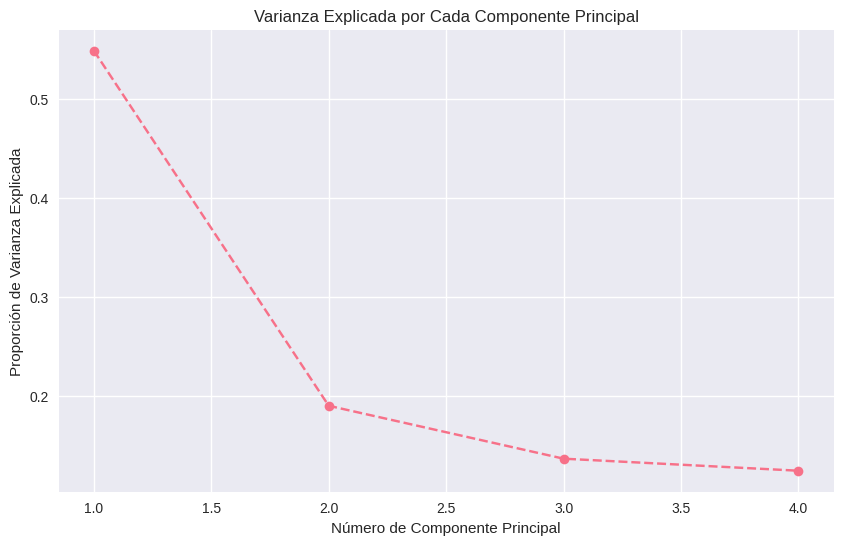

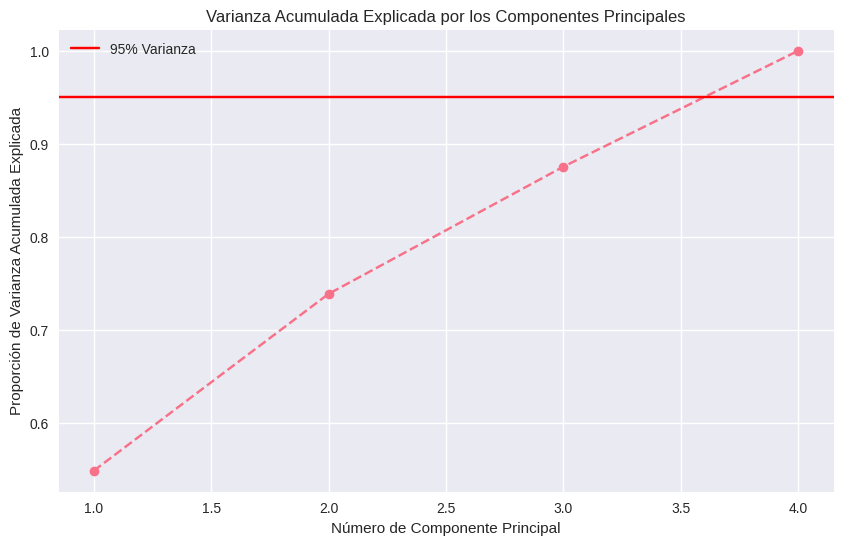

In [12]:
# Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Varianza Explicada por Cada Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada por los Componentes Principales')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Acumulada Explicada')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza') # Línea para 95%
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Transformar los datos al espacio de los componentes principales

n_components_chosen = min(5, df_scaled.shape[1])
print(f"\nTransformando datos a {n_components_chosen} componentes principales.")

pca_chosen = PCA(n_components=n_components_chosen)
df_pca_transformed = pca_chosen.fit_transform(df_scaled)

# Crear un DataFrame con los componentes principales
pca_cols = [f'PC{i+1}' for i in range(n_components_chosen)]
df_pca_result = pd.DataFrame(df_pca_transformed, columns=pca_cols, index=df_pca.index)

print("\nPrimeras filas del DataFrame transformado con PCA:")
print(df_pca_result.head())
print(f"Dimensiones del DataFrame transformado: {df_pca_result.shape}")


Transformando datos a 4 componentes principales.

Primeras filas del DataFrame transformado con PCA:
        PC1       PC2       PC3       PC4
0  0.509620  0.781244  0.552725  0.260394
1 -0.217811 -0.365673 -0.669543 -0.095846
2  0.791333  0.627040  0.522370  0.399394
3 -0.032307 -0.585773  0.543582  1.060262
4  1.996811  0.053033  0.616808  0.883284
Dimensiones del DataFrame transformado: (1460, 4)


In [14]:
# crear nuevas características que reflejen las relaciones encontradas
# Feature1: Suma del área habitable y del sótano

df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['Feature1_TotalLivBsmtArea'] = df['GrLivArea'] + df['TotalBsmtSF']

In [15]:
# Feature2: Producto del área del sótano con el año de la última renovación

df['YearRemodAdd'] = df['YearRemodAdd'].fillna(df['YearBuilt'])
df['Feature2_BsmtAreaRemodYear'] = df['TotalBsmtSF'] * df['YearRemodAdd']

In [16]:
print(df[['GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'Feature1_TotalLivBsmtArea', 'Feature2_BsmtAreaRemodYear']].head())
print(f" {df.shape[0]} filas, {df.shape[1]} columnas")

   GrLivArea  TotalBsmtSF  YearRemodAdd  Feature1_TotalLivBsmtArea  Feature2_BsmtAreaRemodYear
0       1710          856          2003                       2566                     1714568
1       1262         1262          1976                       2524                     2493712
2       1786          920          2002                       2706                     1841840
3       1717          756          1970                       2473                     1489320
4       2198         1145          2000                       3343                     2290000
 1460 filas, 83 columnas


# XGBoost

In [18]:
# Identificar variables categóricas para One-Hot Encoding
categorical_cols_for_encoding = df.select_dtypes(include='object').columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols_for_encoding, dummy_na=False)

# Manejar valores faltantes
# Rellenamos con la mediana
for col in df_encoded.columns:
    if df_encoded[col].isnull().any():
        if df_encoded[col].dtype != 'object':
            median_val = df_encoded[col].median()
            df_encoded[col].fillna(median_val, inplace=True)

In [19]:
# Separar características (X) y variable objetivo (y)
if 'SalePrice' in df_encoded.columns:
    y = np.log1p(df_encoded['SalePrice']) # Aplicar log(1+x) a la variable objetivo (transformación común para RMSLE)
    X = df_encoded.drop(['SalePrice', 'Id'], axis=1, errors='ignore') # Eliminar SalePrice y Id

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Inicializar y configurar el modelo XGBoost

xgb_model = XGBRegressor(
    objective='reg:squarederror', # Objetivo para regresión (MSE)
    n_estimators=1000, # Número de árboles
    learning_rate=0.05, # Tasa de aprendizaje
    max_depth=5, # Profundidad máxima del árbol
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,
    random_state=42,
    n_jobs=-1 # Usar todos los cores disponibles
)


In [21]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train, verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

In [23]:
# Invertir la transformación para compararlas con los valores reales
y_pred_original_scale = np.expm1(y_pred)
y_test_original_scale = np.expm1(y_test)

# Asegurarse de que no haya valores negativos en las predicciones
y_pred_original_scale[y_pred_original_scale < 0] = 0




In [ ]:
# Calcular el RMSLE
rmsle_score = np.sqrt(mean_squared_log_error(y_test_original_scale, y_pred_original_scale))
print(f"RMSLE en el conjunto de prueba: {rmsle_score}")


OverallQual                  0.103103
Feature1_TotalLivBsmtArea    0.075596
ExterQual_TA                 0.074005
CentralAir_N                 0.071411
BsmtQual_Ex                  0.046381
KitchenQual_TA               0.045700
GarageCars                   0.041345
CentralAir_Y                 0.039377
KitchenAbvGr                 0.032616
GarageCond_TA                0.028456
dtype: float32


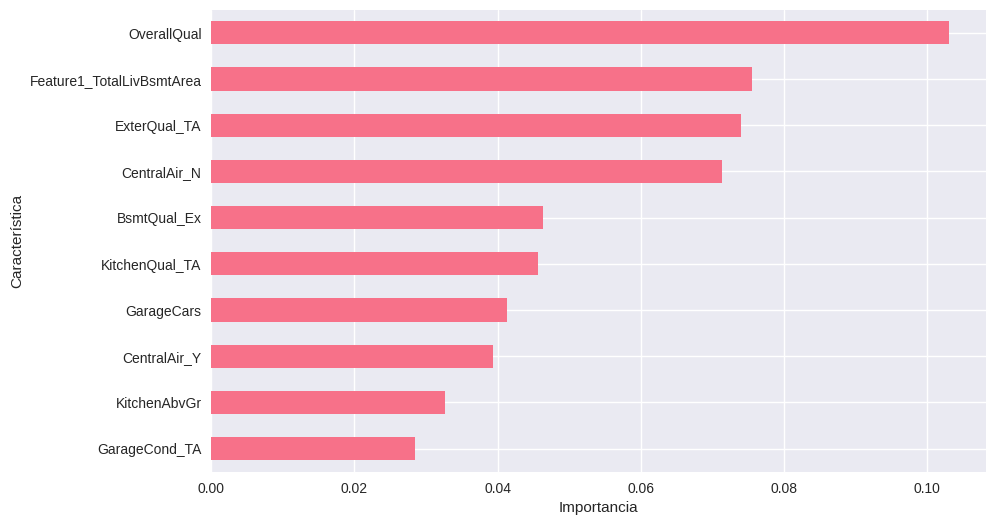

In [26]:

feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

print(top_features)
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.gca().invert_yaxis()
plt.show()

# Conclusiones

El modelo XGBoost aplicado para predecir precios de viviendas presenta un error RMSLE (Root Mean Squared Logarithmic Error) en el conjunto de prueba de 0.1352, lo cual indica un buen desempeño en la predicción de precios con baja dispersión logarítmica entre valores reales y estimados.

Una de las caracter´siticas más importantes es Feature1_TotalLivBsmtArea, que creamos atenriormente (Suma del área habitable y del sótano)